In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Training.csv')

In [ ]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [ ]:
dataset.shape

(4920, 133)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")

SVC Accuracy: 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


RandomForest Accuracy: 1.0
RandomForest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


GradientBoosting Accuracy: 1.0
GradientBoosting Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


KNeighbors Accuracy: 1.0
KNeighbors Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ..

In [ ]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
test_accuracy = accuracy_score(y_test,ypred)

In [ ]:
train_pred = svc.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy
if train_accuracy - test_accuracy > 0.1:  # 10% gap threshold
    print("The model is likely overfitting.")
else:
    print("The model generalizes well.")

The model generalizes well.


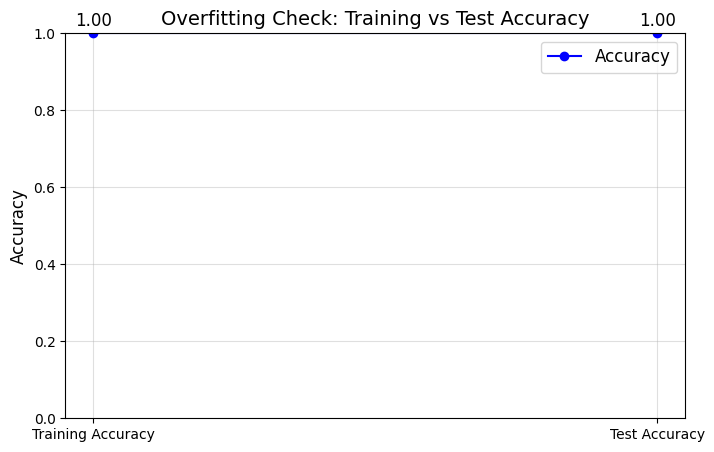

In [ ]:
# Plotting
import matplotlib.pyplot as plt

# Plotting as a line chart
labels = ['Training Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 5))
plt.plot(labels, accuracies, marker='o', color='blue', label="Accuracy")

# Adding details to the plot
plt.title('Overfitting Check: Training vs Test Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.grid(alpha=0.4)
plt.legend(fontsize=12)

# Display the accuracies as text on the plot
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

plt.show()

In [ ]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [ ]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [ ]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [40]
Actual Disease : 40


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [39]
Actual Disease : 39


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
sym_des = pd.read_csv('drive/MyDrive/symtoms_df.csv')
precautions = pd.read_csv('drive/MyDrive/precautions_df.csv')
workout = pd.read_csv('drive/MyDrive/workout_df.csv')
description = pd.read_csv('drive/MyDrive/description.csv')
medications = pd.read_csv('drive/MyDrive/medications.csv')
diets = pd.read_csv('drive/MyDrive/diets.csv')

In [ ]:
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [ ]:
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms.......chills
=================predicted disease============
Allergy
=================description==================
Allergy is an immune system reaction to a substance in the environment.
=================precautions==================
1 :  apply calamine
2 :  cover area with bandage
3 :  nan
4 :  use ice to compress itching
=================medications==================
5 :  ['Antihistamines', 'Decongestants', 'Epinephrine', 'Corticosteroids', 'Immunotherapy']
=================workout==================
6 :  Avoid allergenic foods
7 :  Consume anti-inflammatory foods
8 :  Include omega-3 fatty acids
9 :  Stay hydrated
10 :  Eat foods rich in vitamin C
11 :  Include quercetin-rich foods
12 :  Consume local honey
13 :  Limit processed foods
14 :  Include ginger in diet
15 :  Avoid artificial additives
=================diets==================
16 :  ['Elimination Diet', 'Omega-3-rich foods', 'Vitamin C-rich foods', 'Quercetin-rich foods', 'Probiotics']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:

import gradio as gr
import numpy as np
import pandas as pd
import pickle

# Load the trained model and other data
svc = pickle.load(open('drive/MyDrive/svc.pkl', 'rb'))
sym_des = pd.read_csv('drive/MyDrive/symtoms_df.csv')
precautions = pd.read_csv('drive/MyDrive/precautions_df.csv')
workout = pd.read_csv('drive/MyDrive/workout_df.csv')
description = pd.read_csv('drive/MyDrive/description.csv')
medications = pd.read_csv('drive/MyDrive/medications.csv')
diets = pd.read_csv('drive/MyDrive/diets.csv')

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}

diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}


def helper(dis):
    desc = description[description['Disease'] == dis]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        if item in symptoms_dict:  # Check if symptom exists in the dictionary
            input_vector[symptoms_dict[item]] = 1
    try:
        predicted_class = svc.predict([input_vector])[0]
        predicted_disease = diseases_list[predicted_class]
        return predicted_disease
    except (KeyError, IndexError):
        return "Unknown Disease"  # Handle cases where prediction fails

def predict_disease(symptoms):
    user_symptoms = [s.strip() for s in symptoms.split(',')]
    user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
    predicted_disease = get_predicted_value(user_symptoms)

    desc, pre, med, die, wrkout = helper(predicted_disease)

    result = f"Predicted Disease: {predicted_disease}\n\n"
    result += f"Description: {desc}\n\n"
    result += "Precautions:\n"
    for i, p_i in enumerate(pre[0]):
      result += f"{i+1}: {p_i}\n"
    result += "\nMedications:\n"
    for i, m_i in enumerate(med):
      result += f"{i+1}: {m_i}\n"
    result += "\nWorkout:\n"
    for i, w_i in enumerate(wrkout):
      result += f"{i+1}: {w_i}\n"
    result += "\nDiets:\n"
    for i, d_i in enumerate(die):
      result += f"{i+1}: {d_i}\n"

    return result

iface = gr.Interface(
    fn=predict_disease,
    inputs=gr.Textbox(label="Enter Symptoms (comma-separated)"),
    outputs=gr.Textbox(label="Disease Prediction"),
    title="Disease Prediction",
    description="Enter your symptoms to get a predicted disease.",
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://31e435903aa2efdf4a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
import pickle
import requests
from bs4 import BeautifulSoup
from googlesearch import search

# [Previous data loading and dictionaries remain the same]

def extract_content(url: str) -> str:
    """Extract and summarize content from a webpage."""
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        content = " ".join([para.get_text() for para in paragraphs[:5]])
        return content.strip() if content.strip() else "I couldn't find any relevant information on that page."
    except Exception as e:
        return f"I encountered an issue while searching: {str(e)}"

def web_search_and_summarize(symptoms: str) -> str:
    """Search the web for information about the symptoms in a conversational way."""
    try:
        query = f"medical symptoms {symptoms} health information"
        results = list(search(query, stop=3))  # Get top 3 results
        if not results:
            return "I searched online but couldn't find any relevant information about these symptoms."

        combined_info = ""
        for i, url in enumerate(results[:2], 1):  # Use top 2 results
            content = extract_content(url)
            if "error" not in content.lower():
                combined_info += f"\nFrom source {i}:\n{content}\n"

        return f"Let me share what I found about your symptoms:\n{combined_info}\n"
    except Exception as e:
        return "I tried searching  but encountered some technical difficulties. Let me focus on analyzing your symptoms directly.\n"

def get_conversational_response(disease, desc, pre, med, die, wrkout):
    """Format the medical diagnosis response in a conversational way."""
    response = f"Based on the symptoms you've described, I think you might have {disease}. "
    response += f"Let me explain what this means:\n\n{desc}\n\n"

    response += "Here's what I recommend:\n\n"
    response += "🛡️ Precautions:\n"
    for p_i in pre[0]:
        if p_i and str(p_i).lower() != 'nan':
            response += f"• {p_i}\n"

    response += "\n💊 Medications that are typically prescribed:\n"
    for m_i in med:
        if m_i and str(m_i).lower() != 'nan':
            response += f"• {m_i}\n"

    response += "\n🏃 Beneficial exercises:\n"
    for w_i in wrkout:
        if w_i and str(w_i).lower() != 'nan':
            response += f"• {w_i}\n"

    response += "\n🥗 Dietary suggestions:\n"
    for d_i in die:
        if d_i and str(d_i).lower() != 'nan':
            response += f"• {d_i}\n"

    response += "\nRemember: This is just general information based on your symptoms. It's important to consult with a healthcare provider for a proper diagnosis and treatment plan."

    return response

def chatbot(message, history):
    """Enhanced chatbot function with more natural conversation."""
    if not history:
        return (
            "Hi! 👋 I'm your medical assistant. I can help you understand what might be causing your symptoms "
            "by searching medical resources and analyzing patterns. While I can provide helpful information, "
            "remember that I'm not a replacement for professional medical advice.\n\n"
            "You can tell me your symptoms in everyday language, like these examples:\n"
            "• 'I have a fever, headache, and feeling very tired'\n"
            "• 'My skin is itchy and has a rash'\n"
            "• 'I'm experiencing back pain and neck stiffness'\n\n"
            "What symptoms are you experiencing?"
        )

    # Clean up the input
    user_symptoms = [s.strip().lower() for s in message.split(',')]
    user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]

    # Map common phrases to symptoms in our dictionary
    symptom_mapping = {
        'tired': 'fatigue',
        'exhausted': 'fatigue',
        'throwing up': 'vomiting',
        'dizzy': 'dizziness',
        'cant balance': 'loss_of_balance',
        'stomach ache': 'stomach_pain',
        'tummy pain': 'stomach_pain',
        'cant breathe': 'breathlessness',
        'hard to breathe': 'breathlessness',
        'trouble breathing': 'breathlessness'
    }

    # Convert common phrases to recognized symptoms
    processed_symptoms = []
    for symptom in user_symptoms:
        if symptom in symptom_mapping:
            processed_symptoms.append(symptom_mapping[symptom])
        else:
            processed_symptoms.append(symptom)

    # Check for valid symptoms
    valid_symptoms = [s for s in processed_symptoms if s in symptoms_dict]
    if not valid_symptoms:
        return ("I'm not quite sure I understood all your symptoms. Could you try describing them differently? "
                "For example, if you're feeling tired, you can say 'fatigue'. "
                "If you're having trouble breathing, say 'breathlessness'.")

    # Get web search results first
    web_info = web_search_and_summarize(message)

    # Get model prediction
    predicted_disease = get_predicted_value(valid_symptoms)
    if predicted_disease == "Unknown Disease":
        return (f"{web_info}\n\nI'm having trouble making a confident assessment based on these symptoms. "
                "Could you provide more details about what you're experiencing? "
                "For example, when did these symptoms start, and are there any other symptoms?")

    # Get detailed information
    desc, pre, med, die, wrkout = helper(predicted_disease)

    # Combine web results and conversational diagnosis
    return f"{web_info}\n{get_conversational_response(predicted_disease, desc, pre, med, die, wrkout)}"

# Create the Gradio interface
iface = gr.ChatInterface(
    fn=chatbot,
    title="🏥 Medical Assistant Chatbot",
    description="I can help you understand your symptoms and provide relevant health information. Remember: Always consult healthcare professionals for proper medical advice.",
    examples=[
        ["I have a fever, headache, and feeling very tired"],
        ["My skin is itchy and has a rash"],
        ["I'm experiencing joint pain and neck pain"],
        ["I have a cough and trouble breathing"]
    ],
    theme="soft"
)

# Launch the interface
if __name__ == "__main__":
    iface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/components/chatbot.py:248: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b2cb0cac4692ec072d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [5]:
pip install google

In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
import pickle
import requests
from bs4 import BeautifulSoup
from googlesearch import search

def predict_from_text(sentence: str):
    """
    Takes a natural language sentence, extracts symptoms, and makes a prediction.

    Args:
        sentence (str): A natural language description of symptoms

    Returns:
        tuple: (predicted_disease, extracted_symptoms, confidence_score)
    """
    # Process the input sentence to extract symptoms
    def process_symptoms(text):
        # Common symptom phrases mapping
        symptom_mapping = {
            'tired': 'fatigue',
            'exhausted': 'fatigue',
            'throwing up': 'vomiting',
            'dizzy': 'dizziness',
            'cant balance': 'loss_of_balance',
            'stomach ache': 'stomach_pain',
            'tummy pain': 'stomach_pain',
            'cant breathe': 'breathlessness',
            'hard to breathe': 'breathlessness',
            'trouble breathing': 'breathlessness',
            'feeling weak': 'weakness_in_limbs',
            'no appetite': 'loss_of_appetite',
            'feel sick': 'nausea',
            'being sick': 'vomiting',
            'cant sleep': 'fatigue',
            'feeling down': 'depression'
        }

        # Clean and split the input text
        symptoms = []
        # Split by both commas and 'and'
        for part in text.lower().split(','):
            for subpart in part.split(' and '):
                symptoms.append(subpart.strip())

        # Clean up symptoms
        symptoms = [symptom.strip("[]' ") for symptom in symptoms if symptom.strip()]

        # Map to recognized symptoms
        processed_symptoms = []
        for symptom in symptoms:
            if symptom in symptom_mapping:
                processed_symptoms.append(symptom_mapping[symptom])
            else:
                processed_symptoms.append(symptom)

        return processed_symptoms

    # Extract symptoms from the sentence
    extracted_symptoms = process_symptoms(sentence)

    # Filter for valid symptoms that exist in symptoms_dict
    valid_symptoms = [s for s in extracted_symptoms if s in symptoms_dict]

    if not valid_symptoms:
        return ("Unknown Disease", [], 0.0)

    # Get model prediction
    predicted_disease = get_predicted_value(valid_symptoms)

    # Calculate a simple confidence score based on number of matched symptoms
    confidence_score = len(valid_symptoms) / len(extracted_symptoms) if extracted_symptoms else 0.0

    return (predicted_disease, valid_symptoms, confidence_score)

def extract_content(url: str) -> str:
    """Extract and summarize content from a webpage."""
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        content = " ".join([para.get_text() for para in paragraphs[:5]])
        return content.strip() if content.strip() else "I couldn't find any relevant information on that page."
    except Exception as e:
        return f"I encountered an issue while searching: {str(e)}"

def web_search_and_summarize(symptoms: str) -> str:
    """Search the web for information about the symptoms in a conversational way."""
    try:
        query = f"medical symptoms {symptoms} health information"
        results = list(search(query, stop=3))
        if not results:
            return "I searched online but couldn't find any relevant information about these symptoms."

        combined_info = ""
        for i, url in enumerate(results[:2], 1):
            content = extract_content(url)
            if "error" not in content.lower():
                combined_info += f"\nFrom source {i}:\n{content}\n"

        return f"Let me share what I found online about your symptoms:\n{combined_info}\n"
    except Exception as e:
        return "I tried searching online but encountered some technical difficulties. Let me focus on analyzing your symptoms directly.\n"

def get_conversational_response(disease, desc, pre, med, die, wrkout, confidence_score):
    """Format the medical diagnosis response in a conversational way."""
    response = f"Based on the symptoms you've described, I think you might have {disease} "
    response += f"(confidence: {confidence_score:.2%}). "
    response += f"Let me explain what this means:\n\n{desc}\n\n"

    response += "Here's what I recommend:\n\n"
    response += "🛡️ Precautions:\n"
    for p_i in pre[0]:
        if p_i and str(p_i).lower() != 'nan':
            response += f"• {p_i}\n"

    response += "\n💊 Medications that are typically prescribed:\n"
    for m_i in med:
        if m_i and str(m_i).lower() != 'nan':
            response += f"• {m_i}\n"

    response += "\n🏃 Beneficial exercises:\n"
    for w_i in wrkout:
        if w_i and str(w_i).lower() != 'nan':
            response += f"• {w_i}\n"

    response += "\n🥗 Dietary suggestions:\n"
    for d_i in die:
        if d_i and str(d_i).lower() != 'nan':
            response += f"• {d_i}\n"

    return response

def chatbot(message, history):
    """Enhanced chatbot function with multiple input support and confidence scoring."""
    if not history:
        return (
            "Hi! 👋 I'm your medical assistant. I can help you understand what might be causing your symptoms "
            "by searching medical resources and analyzing patterns. While I can provide helpful information, "
            "remember that I'm not a replacement for professional medical advice.\n\n"
            "You can tell me your symptoms in everyday language, like these examples:\n"
            "• 'I have a fever, headache, and feeling very tired'\n"
            "• 'My skin is itchy and has a rash'\n"
            "• 'I'm experiencing back pain and neck stiffness'\n\n"
            "What symptoms are you experiencing?"
        )

    # Get prediction for current symptoms
    predicted_disease, valid_symptoms, confidence_score = predict_from_text(message)

    if not valid_symptoms:
        return ("I'm not quite sure I understood those symptoms. Could you try describing them differently? "
                "For example:\n"
                "• If you're feeling tired, say 'fatigue'\n"
                "• If you're having trouble breathing, say 'breathlessness'\n"
                "• If you have a stomach ache, say 'stomach_pain'\n"
                "What symptoms are you experiencing?")

    # Get web search results for current symptoms
    web_info = web_search_and_summarize(message)

    if predicted_disease == "Unknown Disease":
        followup_questions = [
            "When did these symptoms start?",
            "Have you noticed any patterns?",
            "Are the symptoms constant or do they come and go?",
            "Does anything make them better or worse?"
        ]
        return (f"{web_info}\n\nI see you've mentioned these symptoms: {', '.join(valid_symptoms)}.\n"
                "I need a bit more information to make a proper assessment.\n\n"
                f"{followup_questions[len(history) % len(followup_questions)]}")

    # Get detailed information
    desc, pre, med, die, wrkout = helper(predicted_disease)

    # Combine web results and conversational diagnosis
    response = f"{web_info}\n"
    response += get_conversational_response(predicted_disease, desc, pre, med, die, wrkout, confidence_score)
    response += "\n\nIs there anything else you'd like to tell me about your symptoms?"

    return response

# Create the Gradio interface
iface = gr.ChatInterface(
    fn=chatbot,
    title="🏥 Medical Assistant Chatbot",
    description="I can help you understand your symptoms and provide relevant health information. You can describe your symptoms gradually, and I'll consider all the information you provide. Remember: Always consult healthcare professionals for proper medical advice.",
    examples=[
        ["I have a fever and headache"],
        ["My skin is itchy"],
        ["I'm experiencing joint pain"],
        ["I have a cough and feeling tired"]
    ],
    theme="soft"
)

# Launch the interface
if __name__ == "__main__":
    iface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/components/chatbot.py:255: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0d2b0f6efb42a49521.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
